<a href="https://colab.research.google.com/github/aryateja1996/GaussianMixtureModelMLP/blob/main/mlp_pf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
mdata = pd.read_csv('titanic.csv')
mdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
mdata = mdata.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
mdata.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [11]:
mdata.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [12]:
mdata.Age = mdata.Age.interpolate()
mdata

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,22.5,23.4500
889,1,1,male,26.0,30.0000


In [13]:
mdata.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [16]:
survivalgroup = mdata.groupby(['Survived']).mean()
survivalgroup

,Pclass,Sex,Age,Fare
Survived,,,,
0,2.531876,0.852459,30.407787,22.117887
1,1.950292,0.318713,28.631711,48.395408


In [15]:
le = LabelEncoder()

mdata.Sex = le.fit_transform(mdata.Sex)
mdata.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [17]:
inputs = mdata.drop(['Survived'],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [18]:
target = mdata.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,shuffle=False)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7932960893854749

In [21]:
model.predict([[1,0,35,49]])

array([1])

In [22]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
cm

array([[92, 23],
       [14, 50]])

Text(69.0, 0.5, 'Truth')

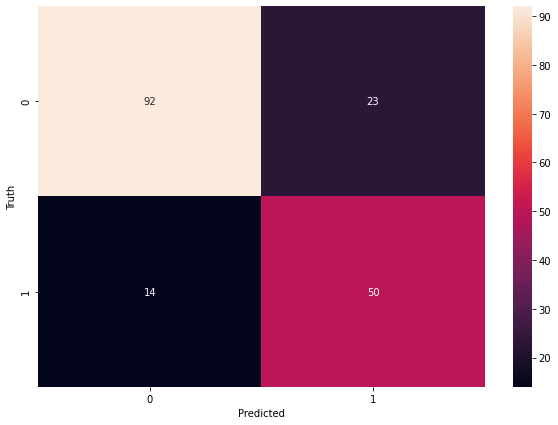

In [23]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')